Import Libraries

In [7]:
import pandas as pd #pandas → handling data (DataFrames)

In [8]:
import numpy as np #numpy → numeric operations

In [9]:
import seaborn as sns #seaborn → for plotting

C:\ProgramData\Anaconda3\anaconda2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
import matplotlib.pyplot as plt  # matplotlib → for plotting

 2. Import ML tools from Scikit-learn

In [11]:
from sklearn.model_selection import train_test_split #train_test_split → splits dataset into training/testing sets
from sklearn.preprocessing import LabelEncoder #LabelEncoder → converts text categories to numbers
from sklearn.linear_model import LogisticRegression # LogisticRegression → classifier we use
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report # metrics → tools to evaluate model performance

Step 1: Load Dataset

In [12]:
df = pd.read_csv('StudentsPerformance.csv') #  Reads the CSV file into a DataFrame called df.
df.head()  #Show first 5 entried of df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


 4. Data Cleaning

In [13]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #Removing whitespace,Lowercasing everything
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
# Optionally drop them
df.duplicated().sum()
df = df.drop_duplicates()

In [16]:
df.shape[0]

1000

 Create 'pass' column based on average score

In [17]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1) # We calculate average of the 3 scores
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0) # If average ≥ 40, label as pass = 1 (else 0)

 6. Encode categorical variables

In [18]:
# Encode categorical features
le = LabelEncoder()  #Categorical columns (like gender, race, etc.) are turned into numbers. e.g., male → 1, female → 0
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

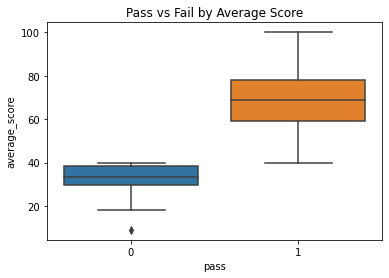

In [20]:
# Create a box plot showing the distribution of average scores for pass and fail groups
# X-axis = pass/fail (0 or 1), Y-axis = average score
ns.boxplot(x='pass', y='average_score', data=df)
# Add a title to the plot
plt.title('Pass vs Fail by Average Score')
# Display the box plot
plt.show()

 7. Define features (X) and target (y)

In [21]:
X = df.drop(['average_score', 'pass'], axis=1) # X = all columns except average score and pass/fail
y = df['pass']                                 # y = the pass label (what we want to predict)

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# 80% training / 20% testing
# random_state=42 ensures repeatable results

9. Train a Logistic Regression model

In [26]:
model = LogisticRegression(max_iter=1000) # max_iter=1000 allows more iterations to ensure convergence
model.fit(X_train, y_train) # fit() trains the model
#10. Make predictions
y_pred = model.predict(X_test) # Predicts labels (0 or 1) on the test set

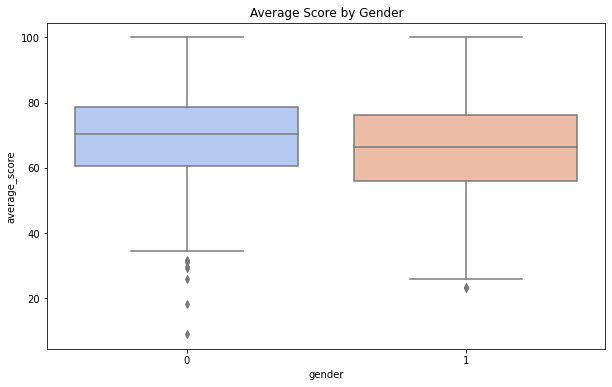

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='average_score', data=df, palette='coolwarm')
plt.title('Average Score by Gender')
plt.show()


11. Evaluate model performance

In [25]:
print('Accuracy:', accuracy_score(y_test, y_pred)) #Accuracy: % correct predictions
print('F1 Score:', f1_score(y_test, y_pred)) #F1 Score: balance between precision & recall 
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred)) #Confusion Matrix: breakdown of TP, TN, FP, FN
print('Classification Report:\n', classification_report(y_test, y_pred)) #Classification Report: full metric overview (precision, recall, F1)

Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

